In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from __future__ import print_function
from __future__ import absolute_import
from __future__ import unicode_literals  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

import IPython

sns.set(color_codes=True)

In [7]:
# f = np.load('../mnist_logreg_lbfgs_retraining-500.npz')
# If running outside of Codalab, change this to
def plot_density(influence_file):
    f = np.load(influence_file)

    actual_loss_diffs = f['actual_loss_diffs']
    predicted_loss_diffs_cg = f['predicted_loss_diffs_cg']
    predicted_loss_diffs_lissa = f['predicted_loss_diffs_lissa']
    indices_to_remove = f['indices_to_remove']
    
    sns.set_style('white')
    fontsize=16
    fig, axs = plt.subplots(1, 3, sharex=True, sharey=False, figsize=(15, 5))
    
    for ax in axs[:2]:
        ax.set_aspect('equal')
        ax.set_xticks(np.arange(-0.06, 0.06, 0.03))
        ax.set_yticks(np.arange(-0.06, 0.06, 0.03))
        ax.set_xlim([-0.05, 0.05])
        ax.set_ylim([-0.05, 0.05])
        ax.plot([-0.05, 0.05], [-0.05, 0.05], 'k-', alpha=0.2, zorder=1)
        
    for ax in axs:
        ax.set_xlabel('Actual diff in loss', fontsize=fontsize)
        
    axs[0].set_ylabel('Predicted diff in loss', fontsize=fontsize)
    axs[2].set_ylabel('Frequency', fontsize=fontsize)
    axs[2].yaxis.set_label_position('right')

    axs[0].scatter(actual_loss_diffs, predicted_loss_diffs_cg, zorder=2)
    axs[0].set_title('Linear (exact)', fontsize=fontsize)
    axs[1].scatter(actual_loss_diffs, predicted_loss_diffs_lissa, zorder=2)
    axs[1].set_title('Linear (approx)', fontsize=fontsize)
    sns.kdeplot(actual_loss_diffs, ax=axs[2])
    axs[2].set_title('Density', fontsize=fontsize)

    # plt.savefig('../figs/fig-approx.png', dpi=600, bbox_inches='tight')

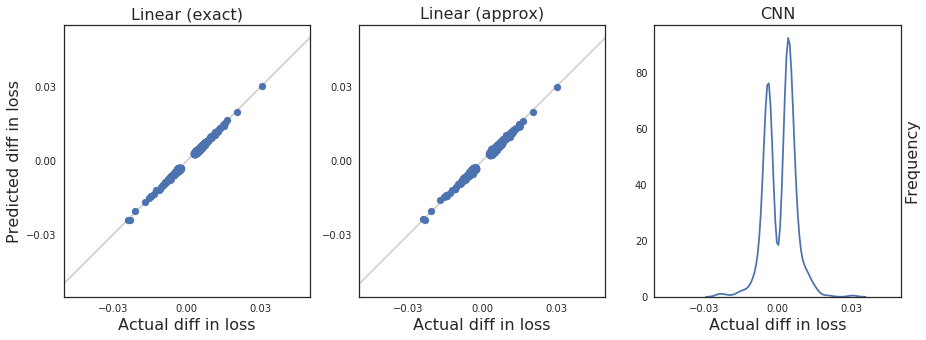

In [3]:
plot_density('../output/mnist_logreg_lbfgs_retraining-500.npz')

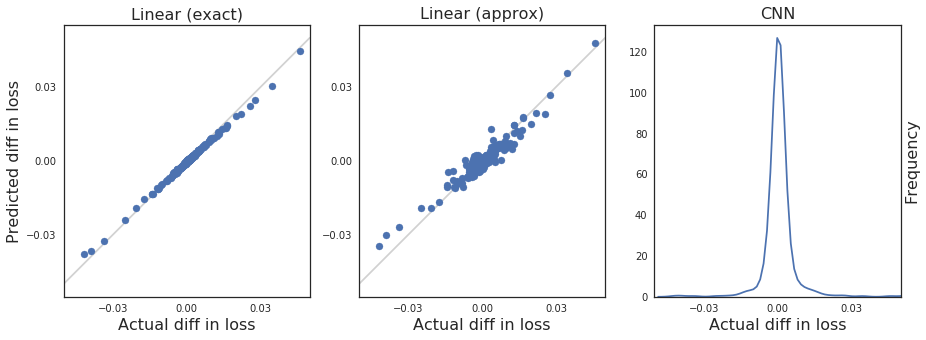

In [4]:
plot_density('../output/mnist_logreg_lbfgs_sparsity_retraining-2-500.npz')

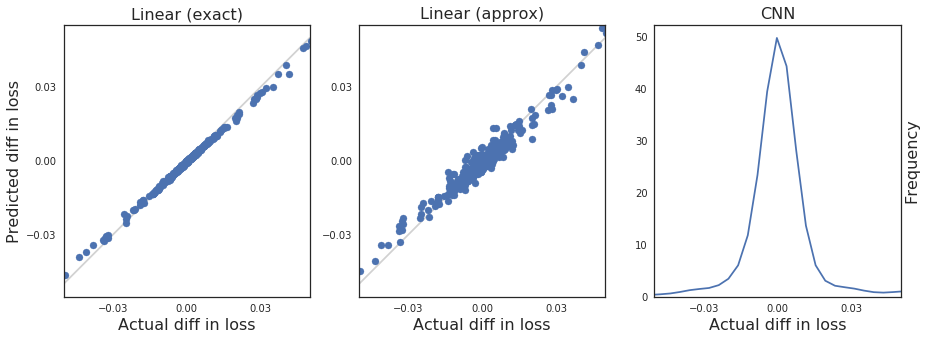

In [5]:
plot_density('../output/mnist_logreg_lbfgs_sparsity_retraining-5-500.npz')

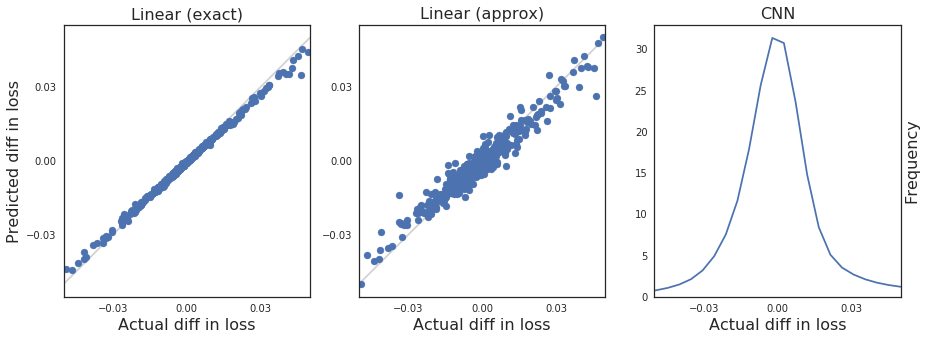

In [6]:
plot_density('../output/mnist_logreg_lbfgs_sparsity_retraining-10-500.npz')